In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras


BEST NETWORK PARAMETERS:
((160, 128, 128, 32), 'relu', 0.2, 'adam'): auc=0.908, acc=0.852
((160, 64), 'relu', 0.5, 'adam'): auc=0.907, acc=0.849
((128, 128, 128, 32), 'relu', 0.5, 'adam'): auc=0.907, acc=0.852
((128, 128, 64), 'relu', 0.5, 'adam'): auc=0.907, acc=0.852
((128, 160, 128, 64), 'relu', 0.35, 'adam'): auc=0.907, acc=0.850


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


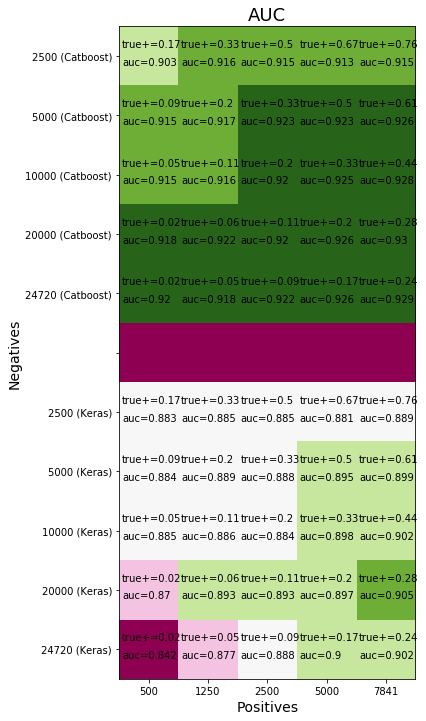

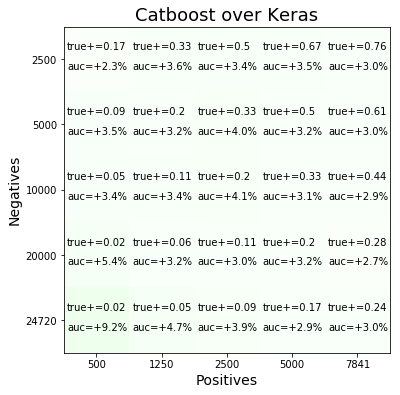

---- METRICS SUMMARY ----
  accuracy: catboost=0.871 (+3.15%), keras=0.845 (-3.05%)

      loss: catboost=0.282 (-15.55%), keras=0.334 (+18.41%)

   roc_auc: catboost=0.929 (+2.97%), keras=0.902 (-2.88%)

-------------------------


In [3]:
from base_experiment import BaseExperiment

class AdultExperiment(BaseExperiment):
    POSITIVE_STEPS = [500, 1250, 2500, 5000, 7841]
    NEGATIVE_STEPS = [2500, 5000, 10000, 20000, 24720]

    def get_dataset(self):
        df = pd.read_csv('adult/adult.data')
#         df = df[:500]
        y = df.label.apply(lambda x: 0 if x.strip() == '<=50K' else 1)
        X = df.drop(columns=['label'])
        cat_features = [
            'workclass', 'education', 'marital_status', 'occupation', 'relationship',
            'race', 'sex', 'native_country',
        ]
        return X, y, cat_features
    
    
AdultExperiment().run()